In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры, это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [3]:
df = pd.read_csv('real_estate_data.csv', sep='\t') 
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
print(f'Количество дубликатов:{df.duplicated().sum()}')

Количество дубликатов:0


### Вывод

На первом шаге данного проекта из предоставленного файла, мною были преобразовани и отображены данные необходимые для ответов на вопросы, поставленные заказчиком. В таблице содержатся 22 столбца и 23699 наблюдений, данные очень обширны и информативны.

## Предобработка данных

Полученные данные требуют тщательной предобработки. Прежде всего необходимо заполнить пропуски в столбцах с важнымми для исследования данными, а также необходимо привести данные к более удобным типам, в целях удобства анализа.

### Заполнение *'ceiling_height'*
Начнем заполнение данных со столбца *'ceiling_height'*. В столбце имеются "артефакты", сложно представить недвижимость с высотой потолков ниже 2 метров или свыше 4 метров. Таких значений не много, но будет неправильно их проигнорировать, поскольку слишком большие значения внесут искажения при подсчете среднего значения, необходимого для заполнения пропусков.

In [5]:
df['ceiling_height'].unique() 

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [6]:
print('Количество артефактов:',
      df[(df['ceiling_height'] <= 2) | (df['ceiling_height'] >= 4)]['ceiling_height'].count()
     )

Количество артефактов: 128


Избавимся от артефактных значений, заменой их на среднее значение по столбцу *'ceiling_height'* без учета "артефактов".

In [7]:
df.loc[(df['ceiling_height'] <= 2) | (df['ceiling_height'] >= 4), 'ceiling_height'] = df[(df['ceiling_height'] > 2) | (df['ceiling_height'] < 4)]['ceiling_height'].mean().round(2)

Заполним пропуски средним значение по всему столбцу *'ceiling_height'*.

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean().round(2)) #замена пропусков на среднее
print('Количество пропусков:', df[df['ceiling_height'].isna()]['ceiling_height'].count()) 
df.head()

Количество пропусков: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.72,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.72,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.72,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Заполнение *'living_area'*
Заполним пропуски столбца *'living_area'*. Все пропуски будут заполняться на соответствующие значения из столбца *'total_area'* помноженные на коэффициент, который соответствует доли занимаемой жилищной зоной от всей площади недвижимости. Данный коэффициент получается путем усреднения всех соотношений жилой и нежилой зоны, для группы жилых помещений с одинаковым количеством комнат.

In [9]:
print('Количество пропусков:', len(df[df['living_area'].isna()]))
df[df['living_area'].isna()].head()

Количество пропусков: 1903


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.72,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.72,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.72,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.72,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [10]:
df['coeff'] = df['living_area'] / df['total_area']                         #создание столбца с соотношением жилой зоны к нежилой
df['coeff'] = df.groupby('rooms')['coeff'].transform('mean')               #усреднение по количеству комнат
df['living_area'] = df['living_area'].fillna(df['total_area'] * df['coeff'])   #заполнение пропусков в столбце 'living_area'
df['living_area'] = df['living_area'].round(2)                        
display(df.head())
print('Количество пропусков:', len(df[df['living_area'].isna()]))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.625302
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.72,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.485989
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.72,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.579287
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.72,14.0,99.42,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.625302
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.579287


Количество пропусков: 0


### Заполнение *'is_apartment'*
Заполнение пропусков в столбце *'is_apartment'*.
Данные в этом столбце являются категориальными и принимают только два значения. Предположительно эти пропуски возникли из-за игнорирования пользователями ввода этих сведений, поскольку недвижимость которую они выставляли на продажу не имела данного параметра. Достаточно заполнить все пропуски значением False.

In [11]:
display(df[df['is_apartment'].isna()].head())
df['is_apartment'] = df['is_apartment'].fillna('False')    #замена пропусков в 'is_apartment' на значение 'False'
display(df.head())
print('Количество пропусков:', df['is_apartment'].isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.625302
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.72,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.485989
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.72,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.579287
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.72,14.0,99.42,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.625302
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.579287


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.625302
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.72,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.485989
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.72,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.579287
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.72,14.0,99.42,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.625302
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.579287


Количество пропусков: 0


### Заполнение *'kitchen_area'*
Заполнение пропусков в столбце *'kitchen_area'* произведем аналогичним методом как для столбца *'living_area'*.

In [12]:
df[df['kitchen_area'].isna()][['floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony']].head()

,floor,is_apartment,studio,open_plan,kitchen_area,balcony
3,9,False,False,False,NaN,0.0
30,2,False,False,False,NaN,NaN
37,1,False,False,False,NaN,NaN
44,3,False,False,False,NaN,1.0
59,13,False,False,False,NaN,NaN


In [13]:
df['coeff'] = df['kitchen_area'] / df['total_area']                       #создание столбца с соотношением кухни ко всей площади
df['coeff'] = df.groupby('rooms')['coeff'].transform('mean')                                   #усреднение по количеству комнат 
display(df[['floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony']].head())

df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * df['coeff'])    #заполнение пропусков в столбце 'kitchen_area'
df['kitchen_area'] = df['kitchen_area'].round(2)                                                

display(df[['floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony']].head())
print('Количество пропусков:', df['kitchen_area'].isna().sum())

,floor,is_apartment,studio,open_plan,kitchen_area,balcony
0,8,False,False,False,25.0,NaN
1,1,False,False,False,11.0,2.0
2,4,False,False,False,8.3,0.0
3,9,False,False,False,NaN,0.0
4,13,False,False,False,41.0,NaN


,floor,is_apartment,studio,open_plan,kitchen_area,balcony
0,8,False,False,False,25.00,NaN
1,1,False,False,False,11.00,2.0
2,4,False,False,False,8.30,0.0
3,9,False,False,False,22.41,0.0
4,13,False,False,False,41.00,NaN


Количество пропусков: 197


В столбце все равно остались пропуски, это возникло из-за того, что в группе с нулем комнат невозможно подсчитать коэффициет соотношения прлощадей, посколку там нет ни одного значения для площади кухни. Возможно в данных помещения кухни не предусмотрены вовсе, поэтому заполним эти пропуски нулями.

In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)                                              

display(df[['floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony']].head())
print('Количество пропусков:', df['kitchen_area'].isna().sum())
del df['coeff']                                                                                 

,floor,is_apartment,studio,open_plan,kitchen_area,balcony
0,8,False,False,False,25.00,NaN
1,1,False,False,False,11.00,2.0
2,4,False,False,False,8.30,0.0
3,9,False,False,False,22.41,0.0
4,13,False,False,False,41.00,NaN


Количество пропусков: 0


### Заполнение *'balcony'*
Заполненим пропуски в столбце *'balcony'*. Раз в этом столбце имеются пропуски, то вероятнее всего балконы отсутвтвуют в данной недвижимости. Заполним все пропуски нулями.

In [15]:
display(df[df['balcony'].isna()][['floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony']].head())
df['balcony'] = df['balcony'].fillna(0)                                                                               
display(df[['floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony']].head())
print('Количество пропусков:', df['kitchen_area'].isna().sum())

,floor,is_apartment,studio,open_plan,kitchen_area,balcony
0,8,False,False,False,25.00,NaN
4,13,False,False,False,41.00,NaN
5,5,False,False,False,9.10,NaN
8,26,False,False,False,8.81,NaN
10,3,False,False,False,8.50,NaN


,floor,is_apartment,studio,open_plan,kitchen_area,balcony
0,8,False,False,False,25.00,0.0
1,1,False,False,False,11.00,2.0
2,4,False,False,False,8.30,0.0
3,9,False,False,False,22.41,0.0
4,13,False,False,False,41.00,0.0


Количество пропусков: 0


### Удаление пропусков в *'locality_name'*
Учитывая что пропусков в столбце *'locality_name'* совсем немного и заполнить их нет никакой возможности, их просто следует удалить. А после удаления необходимо восстановить индексы датафрэйма.

In [16]:
display(df[df['locality_name'].isna()].head())
print('Количество пропусков:', len(df[df['locality_name'].isna()]))
df = df.drop(df[df['locality_name'].isna()].index).reset_index(drop=True)
print('Количество пропусков:', len(df[df['locality_name'].isna()]))
print('Новая длина датафрэма:', len(df))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.72,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.72,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.72,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.72,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Количество пропусков: 49
Количество пропусков: 0
Новая длина датафрэма: 23650


### Заполнение *'cityCenters_nearest'*
Сгруппируем датафрэйм по населенному пункту и найдем среднее значение удаленности для каждой группы. Затем заполним пропуски полученными медиальными значениями удаленности населенных пунктов от центра. Для того, чтобы группировка была более успешной, заменим литеру *'ё'* в названиях населенных пунктов на соответствующую ей *'е'*.

In [17]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')    #замена букв во всех значения столбца 'locality_name'
print('Количество пропусков:', len(df[df['cityCenters_nearest'].isna()]))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform('median'))
print('Количество пропусков:', len(df[df['cityCenters_nearest'].isna()]))

Количество пропусков: 5511
Количество пропусков: 4864


Нам удалось зполнить 647 пропусков столбца *'cityCentres_nearest'* правильными соответствующими значениями. Все остальные пропуски данного столбца заменить подобным образом не имеется возможности, слишком мало данных о удаленности некоторых населенных пунктов. Поэтому остальные пропуски будут заменяться на значения медианы данного столбца.

In [18]:
df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df['cityCenters_nearest'].median() 

### Заполнение *'days_exposition'*
Как мне кажется, пропуски в данном столбце возникли, из-за того что данные объявления не были сняты с публикации и оставались активными. На данном этапе все пропуски заменим на ноль, но в дальнейшем эти ячейки будут заполнены по другому принципу.

In [19]:
print('Количество пропусков:', len(df[df['days_exposition'].isna()]))
df['days_exposition'] = df['days_exposition'].fillna(0)
print('Количество пропусков:', len(df[df['days_exposition'].isna()]))

Количество пропусков: 3180
Количество пропусков: 0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around30

В наших данных осталось несколько столбцов с пропусками, данные пропуски заполняться не будут. Либо эти пропуски незначительны и не мешают дальнейшим исследованиям, как в столбце *'floors_total'*, либо пропуски присутствуют в тех данных, которые нам не требуются для решения поставленных задач, поэтому их заполненение не имеет смысла. Поэтому этам по заполнению отсутствующих значений можно считать завершенным и перейти к изменению типов данных.

### Изменение типов данных
Заменим типы данных в некоторых столбцах, для того, чтобы в дальнейшем было удобнее проводить операции над данными хранящимися в этих столбцах.

In [21]:
df = df.astype({'last_price':'int', 'balcony':'int'})      

In [22]:
def convert(*col):                
    for i in col:
        df[i] = df[i].round(0).astype('Int64')

convert('floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition')

In [23]:
df['is_apartment'] = df['is_apartment'].astype('bool') 

In [24]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000,40.4,2018-12-04,1,2.72,11,18.60,1,True,...,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.72,5,34.30,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.72,14,99.42,9,True,...,22.41,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int32
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23565 non-null Int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int32
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        18140 non-null Int64
parks_nearest           8064 non-null float64
ponds_around3000

Все данные исходного датафрейма преобразованы в нужный тип.

###  Вывод
Теперь все наши данне полученные от заказчика прошли предобработку. В них заполнены пропуски и изменены типы данных. И благодаря этому можно перейти к категоризации данных.

## Расчёты и добавление результатов в таблицу

### Расчет цены за квадратный метр
Категоризацию данных начнем с добавленя пожалуй самого важного показателя в ценообразовании недвижимости - цена за квадратный метр.

In [26]:
df['area_price'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.72,11,18.60,1,True,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.72,5,34.30,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.72,14,99.42,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000


### Добавление дня недели, месяца и года
Теперь добавим столбцы категоризации с данными о дне недели, месяце и годе размещения объявления.

In [27]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday         
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month  
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year   
def day_week(row):
    try:
        if row == 0:
            return 'Monday'
        if row == 1:
            return 'Tuesday'
        if row == 2:
            return 'Wednesday'
        if row == 3:
            return 'Thursday'
        if row == 4:
            return 'Friday'
        if row == 5:
            return 'Saturday'
        if row == 6:
            return 'Sunday'
    except:
        pass

def month(row):                   
    months = ["January", "Febuary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    row = months[row - 1]
    return row

df['day_of_week'] = df['day_of_week'].apply(day_week)
df['month'] = df['month'].apply(month)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price,day_of_week,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,16028.0,1,482.0,2,755.0,0,120370.370370,Thursday,March,2019
1,7,3350000,40.4,2018-12-04,1,2.72,11,18.60,1,True,...,18603.0,0,NaN,0,NaN,81,82920.792079,Tuesday,December,2018
2,10,5196000,56.0,2015-08-20,2,2.72,5,34.30,4,True,...,13933.0,1,90.0,2,574.0,558,92785.714286,Thursday,August,2015
3,0,64900000,159.0,2015-07-24,3,2.72,14,99.42,9,True,...,6800.0,2,84.0,3,234.0,424,408176.100629,Friday,July,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,8098.0,2,112.0,1,48.0,121,100000.000000,Tuesday,June,2018


### Добавление этажа квартиры
На этом шаге добавим столбец который будет разбивать недвижимость на категории в зависимости от того на каком этаже она расположена.

In [28]:
def floor(df):                                     
    total_floor = df['floors_total']
    fluur = df['floor']
    if fluur == total_floor:
        return 'Последний'
    if fluur == 1:
        return 'Первый'
    else:
        return 'Другой'
    
df['floors_group'] = df.apply(floor, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price,day_of_week,month,year,floors_group
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,1,482.0,2,755.0,0,120370.370370,Thursday,March,2019,Другой
1,7,3350000,40.4,2018-12-04,1,2.72,11,18.60,1,True,...,0,NaN,0,NaN,81,82920.792079,Tuesday,December,2018,Первый
2,10,5196000,56.0,2015-08-20,2,2.72,5,34.30,4,True,...,1,90.0,2,574.0,558,92785.714286,Thursday,August,2015,Другой
3,0,64900000,159.0,2015-07-24,3,2.72,14,99.42,9,True,...,2,84.0,3,234.0,424,408176.100629,Friday,July,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,2,112.0,1,48.0,121,100000.000000,Tuesday,June,2018,Другой


In [29]:
df['ratio_living'] = df['living_area'] / df['total_area']   #добавление столбца 'ratio_living' с соотношением жилой и общей зон
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price,day_of_week,month,year,floors_group,ratio_living
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,482.0,2,755.0,0,120370.370370,Thursday,March,2019,Другой,0.472222
1,7,3350000,40.4,2018-12-04,1,2.72,11,18.60,1,True,...,NaN,0,NaN,81,82920.792079,Tuesday,December,2018,Первый,0.460396
2,10,5196000,56.0,2015-08-20,2,2.72,5,34.30,4,True,...,90.0,2,574.0,558,92785.714286,Thursday,August,2015,Другой,0.612500
3,0,64900000,159.0,2015-07-24,3,2.72,14,99.42,9,True,...,84.0,3,234.0,424,408176.100629,Friday,July,2015,Другой,0.625283
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,112.0,1,48.0,121,100000.000000,Tuesday,June,2018,Другой,0.320000


In [30]:
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area'] #добавление столбца 'ratio_kitchen' с соотношением кухонной и общей зон
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_price,day_of_week,month,year,floors_group,ratio_living,ratio_kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,2,755.0,0,120370.370370,Thursday,March,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.72,11,18.60,1,True,...,0,NaN,81,82920.792079,Tuesday,December,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.72,5,34.30,4,True,...,2,574.0,558,92785.714286,Thursday,August,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.72,14,99.42,9,True,...,3,234.0,424,408176.100629,Friday,July,2015,Другой,0.625283,0.140943
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,1,48.0,121,100000.000000,Tuesday,June,2018,Другой,0.320000,0.410000


### Вывод
С этим шагом был выполнен ряд важных расчетов и преобразований. Теперь в данныех есть необходимые соотношения, я так же категории, которые помогут в дальнейшем исследовании данных для ответа на поставленные вопросы.

## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков

#### Площадь

Изучим данные столбца *'total_area'*:

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

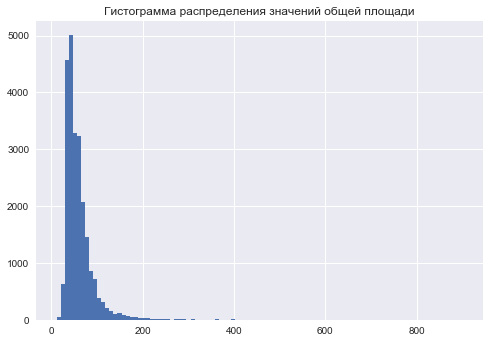

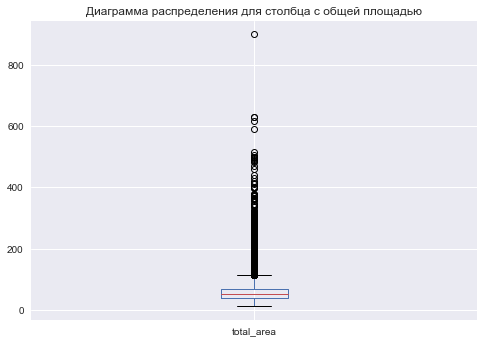

In [31]:
display(df['total_area'].describe())
plt.style.use('seaborn')
df.hist('total_area', bins=100)
plt.title('Гистограмма распределения значений общей площади')
plt.show()
df.boxplot('total_area')
plt.title('Диаграмма распределения для столбца с общей площадью')
plt.show()

Данные даного столбца вполне пригодны для дальнейшего анализа. Они имеют нормальное распределение,а также значения среднего и медианы не сильно разнятся, в связи с тем, что в данных мало выбросов, за исключение небольшого количества недвижимости очень большой площади.

#### Цена

Оценим ценовые значения недвижимости в столбце *'last_price'*:

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


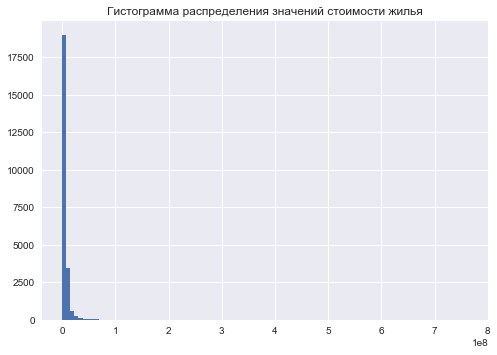

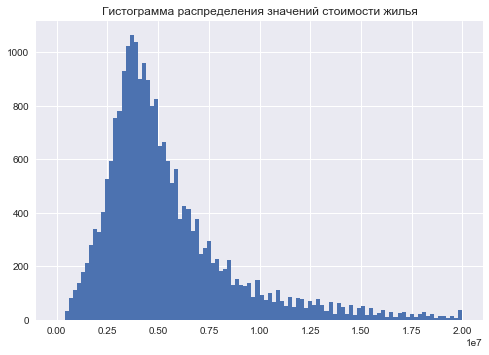

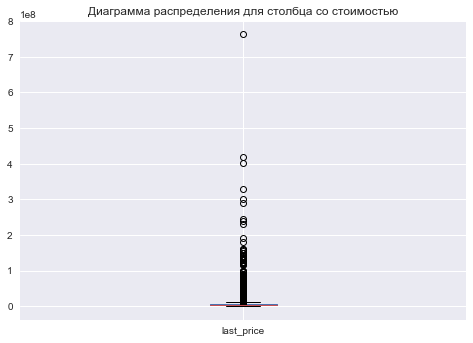

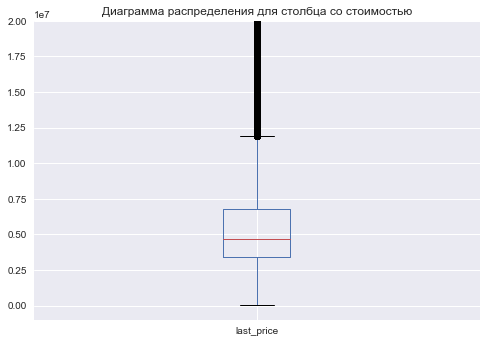

In [32]:
print(df['last_price'].describe())
df.hist('last_price', bins=100)
plt.title('Гистограмма распределения значений стоимости жилья')
plt.show()
df.hist('last_price', bins=100, range=(0, 2e7))
plt.title('Гистограмма распределения значений стоимости жилья')
plt.show()
df.boxplot('last_price')
plt.title('Диаграмма распределения для столбца со стоимостью')
plt.show()
df.boxplot('last_price')
plt.ylim(-0.1e7, 2e7)
plt.title('Диаграмма распределения для столбца со стоимостью')
plt.show()

Ситуация с данными в столбце *'last_price'* аналогична ситуации в данных столбца *'total_area'*, с разнице в том, что в столбце с ценами на нидвижимость гораздо больше очень высоких значений, поэтому и больше отклонений.

#### Число комнат

Изучим данные по количеству комнат в столбце *'rooms'*:

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


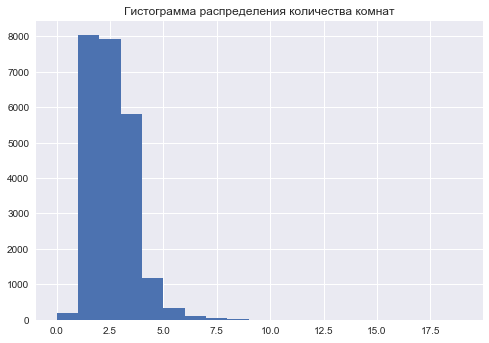

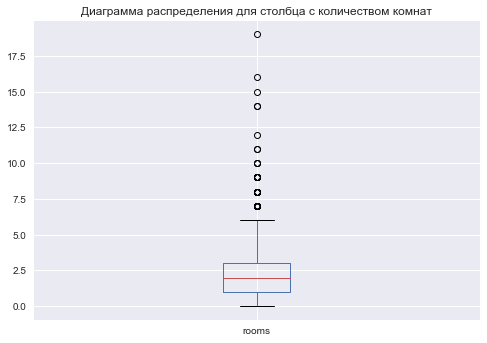

In [33]:
print(df['rooms'].describe())
df.hist('rooms', bins=19)
plt.title('Гистограмма распределения количества комнат')
plt.show()
df.boxplot('rooms')
plt.title('Диаграмма распределения для столбца с количеством комнат')
plt.show()

В столбце *'rooms'* имеются хорошие данные с нормальным распределением.

#### Высота потолков

Проанализируем данные по высоте потолков столбца *'ceiling_height'*:

count    23650.000000
mean         2.718997
std          0.194052
min          2.200000
25%          2.600000
50%          2.720000
75%          2.720000
max          3.980000
Name: ceiling_height, dtype: float64


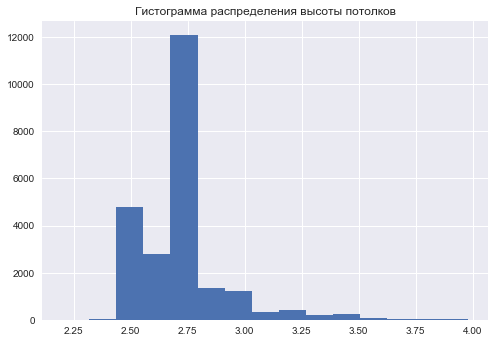

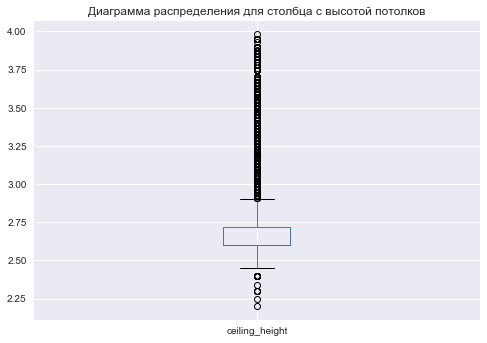

In [34]:
print(df['ceiling_height'].describe())
df.hist('ceiling_height', bins=15)
plt.title('Гистограмма распределения высоты потолков')
plt.show()
df.boxplot('ceiling_height')
plt.title('Диаграмма распределения для столбца с высотой потолков')
plt.show()

На гистограмме имеется высокий выделяющийся пик, это связано с тем, что большое количество пропусков данного столбца заполнялось средним значением. Поэтому распределение не очень похоже на нормальное. В целом данные вполне приемлимые и пригодные для дальнейшего анализа.

### Изучение времени продажи квартиры

Для изучения времени продажи квартир нам понадобятся данные из столбца *'days_exposition'*. На этапе предобработки, достаточное большое количество пропущенных значений, были заполнены нулями. Теперь перезаполним эти значения, считая что пропуски были возникли из-за того, что данные объвления все еще были актуальны на момент последней даты исходных данных.

Создаем новый столбик в котором к значениям даты публикации объявления будет добавлено время действия объявления.

In [35]:
temp = df['days_exposition'].apply(lambda x: pd.Timedelta(x, unit='D'))   #создание переменной со значением столбца 'days_exposition' в формате timedelta
df['last_day_exposition'] = df['first_day_exposition'] + temp     #создание нового столбца со значением окончания действия объявления
max_date = max(df['last_day_exposition'])                    #последняя дата в исходном датафрэме
max_date

Timestamp('2019-05-03 00:00:00')

Теперь с помощью цикла заменим нулевые значения на разность даты публикации и максимальной даты.

In [36]:
for i in range(len(df)):
    if df.loc[i, 'days_exposition'] == 0:
        df.loc[i, 'days_exposition'] = (max_date - df.loc[i, 'first_day_exposition']).days
        
del df['last_day_exposition']

In [37]:
print(' Среднее время продажи:', df['days_exposition'].mean().round(), '\n',
      'Медианное время продажи:', df['days_exposition'].median()
     )

 Среднее время продажи: 186.0 
 Медианное время продажи: 94.0


count    23650.000000
mean       185.714419
std        233.455771
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64


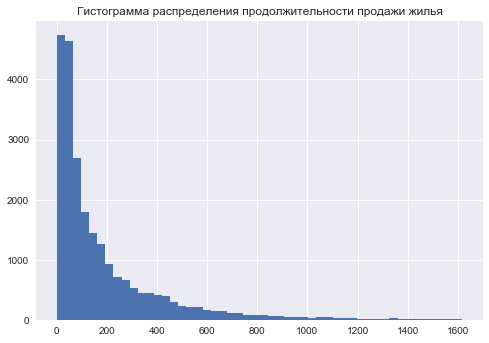

In [38]:
print(df['days_exposition'].describe())
df.hist('days_exposition', bins=50)
plt.title('Гистограмма распределения продолжительности продажи жилья')
plt.show()

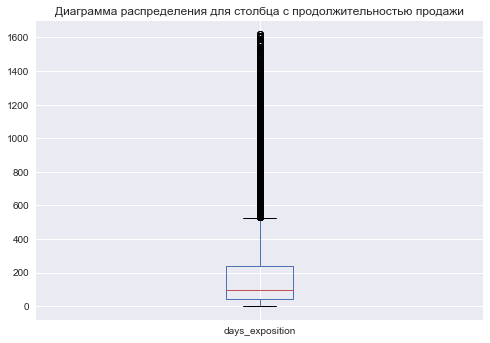

In [39]:
df.boxplot('days_exposition')
plt.title('Диаграмма распределения для столбца с продолжительностью продажи')
plt.show()

Данные времени продажи оказались очень сложноинтерпритируемы. С одной стороны у нас имеется большое число данных с очень малым временем продажи, с друго малое количество очень длительных периодов продажи недвижимости. Оба этих факта вносят свои искажения. Поэтому ожидаемым временем продажи квартиры будем считать значение медианы столбца, поскольку она устойчива к выбросам в сравнении со средним значением. 
Будем считать, что продажи прошли слишком быстро, если они совершены менее чем за 5 дней, строк, подходящих под это условине относительно немного. А необычно долгими продажами назовем продажу, более 1000 дней, это почти 3 года. Подозрительно долгие объявления, видимо они совершенно не вызывают интерес, по каким-то причинам. Количество данных с такой продолжительностью продажи очень невелико, поэтому с ними можно легко расстаться.

### Удаление редких и выбивающихся значений

При изучении параметров, необоходимых для ответа на поставленные задачи, были обнаружены некоторые редкие и немного отклоняющиеся значения. Данные значения внесут вредные для нас поправки при дальнейшем исследовании, и исказят данные, поэтому от них следует избавиться.

Избавимся от очень больших значений цены и площади недвижимости, а также устраним с очень медленными и слишком быстрыми продажами:

In [40]:
df = df.query('total_area < 300 and last_price < 2e7 and (5 < days_exposition < 1000)')
len(df)

21964

In [41]:
df['rooms'].value_counts()

1     7694
2     7506
3     5331
4      954
5      211
0      183
6       56
7       21
8        5
11       1
10       1
9        1
Name: rooms, dtype: int64

При рассмотрении данных о количестве комнат, можно сделать вывод, что объявлении с большим количеством комнат очень мало, поэтому совершенно целесообразно отказаться от них, это практически не изменит исходных данных. Еще в столбце имеются нулевые значения, их всего 197, добавим их в группу однокомнатных помещений.

In [42]:
df = df.query('rooms < 8')
df.loc[df['rooms'] == 0, 'rooms'] = 1
df['rooms'].value_counts()

1    7877
2    7506
3    5331
4     954
5     211
6      56
7      21
Name: rooms, dtype: int64

In [43]:
len(df)

21956

Длина нового датафрэйма - 21956. Было утеряно 1644 строки, это достаточно много, совершенно неприятно расставаться с таким количеством данных, почти 7%. Но устранение таких выбивающихся значений позволит достичь более хороших результатов, поэтому от них следует отказаться.

### Факторы влияющие на стоимость квартиры

Оценим факторы, которые больше всего влияют на стоимость недвижимости:

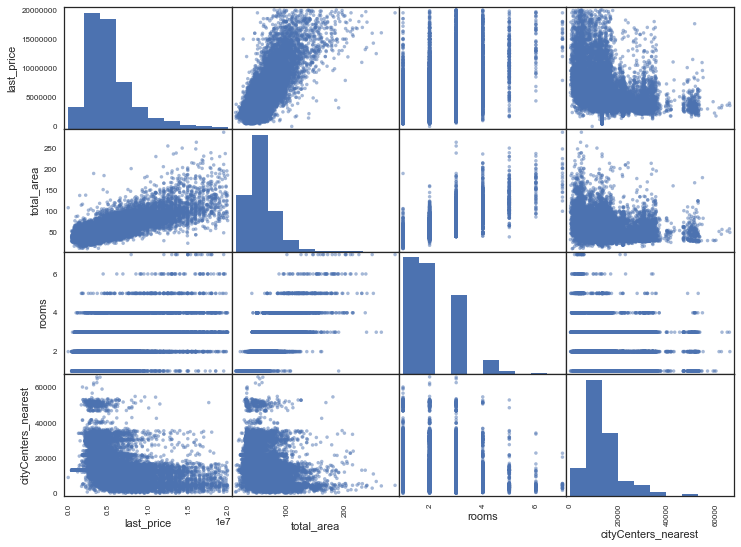

In [44]:
df_price = df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
plt.style.use('seaborn-white')
pd.plotting.scatter_matrix(df_price, figsize=(12, 9))
plt.show()

In [45]:
df_price.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.773254,0.512647,-0.293107
total_area,0.773254,1.000000,0.798231,-0.182846
rooms,0.512647,0.798231,1.000000,-0.136833
cityCenters_nearest,-0.293107,-0.182846,-0.136833,1.000000


После построения матриц диаграмм рассеяния и корреляции, можно сделать выводы. Хорошо видно, что цена на недвижимость тесно связана с площадью, коэффициент корелляции составляет 0,77. Вполне предсказуемо, больше площадь жилья больше и цена на это жилье. Так же имеется прямая взаимосвязь цены и количества комнат, она уже не такая сильная, видимо не всегда увеличение числа команат приводит к увеличению площади. И наконец, можно наблюдать слабую, почти не заметную обратную корреляцию между ценой и отдаленностью от центра. Ожидалось, что эта взаимосвязь будет сильнее, но видимо имеются другие факторы влияющие на цену, например может быть так, что по отдалению площадь продаваемых квартир в нашей выборке в среднем увеличивается, поэтому при удалении от центра, стоимость на недвижимость не стремится резко падать, или что-то еще.

Проверим как зависит цена от этажа квартиры. Будем рассматривать этажи по группам: первый, другой или последний:

,last_price,count
floors_group,,
Первый,4.348151e+06,2736
Последний,5.090408e+06,3079
Другой,5.618819e+06,16141


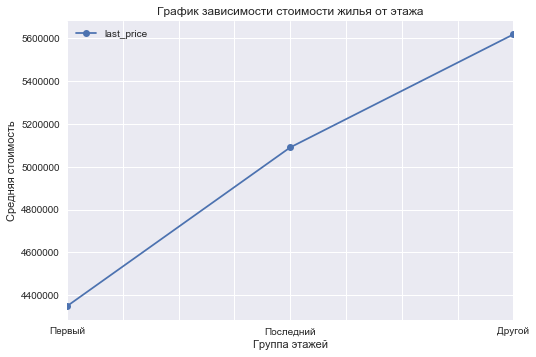

In [46]:
def show_func(col, sort='last_price'):         
    pivot = df.pivot_table(index=col, values='last_price')  
    pivot['count'] = df[col].value_counts()                 
    pivot = pivot.sort_values(by=sort)                     
    return display(pivot), plt.show(), pivot.plot(y='last_price', style='o-')

plt.style.use('seaborn')
show_func('floors_group')
plt.title('График зависимости стоимости жилья от этажа')
plt.ylabel('Средняя стоимость')
plt.xlabel('Группа этажей')
plt.show()

Средняя цена на квартиры расположенные на первом или на последнем этажах на порядок ниже чем цены на любой другой этаж. Самые низкие цены на квартиры первого этажа.

,last_price,count
day_of_week,,
Sunday,5.194408e+06,1545
Saturday,5.227293e+06,1814
Monday,5.351706e+06,3339
Friday,5.360037e+06,3708
Tuesday,5.428082e+06,3884
Thursday,5.462846e+06,3954
Wednesday,5.476420e+06,3712


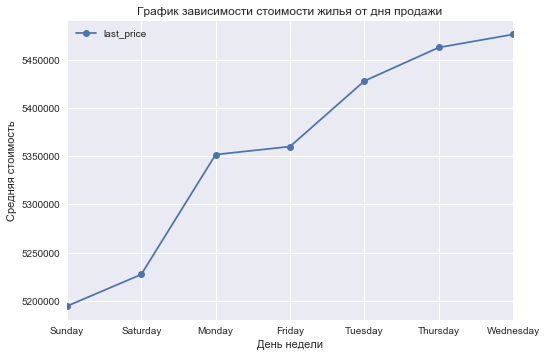

In [47]:
show_func('day_of_week')
plt.title('График зависимости стоимости жилья от дня продажи')
plt.ylabel('Средняя стоимость')
plt.xlabel('День недели')
plt.show()

Прослеживается зависимость цен на недвижимость от дня недели размещения объявления. Объявления опубликованные в середине недели (вторник, среда, четверг) имеют значительно более высокие показатели средней цены, чем в другие дни недели.

,last_price,count
month,,
June,5.170472e+06,1645
December,5.314252e+06,1503
January,5.322088e+06,1377
May,5.347096e+06,1130
August,5.369947e+06,1647
Febuary,5.373789e+06,2475
October,5.375213e+06,2007
March,5.395026e+06,2411
July,5.402976e+06,1590


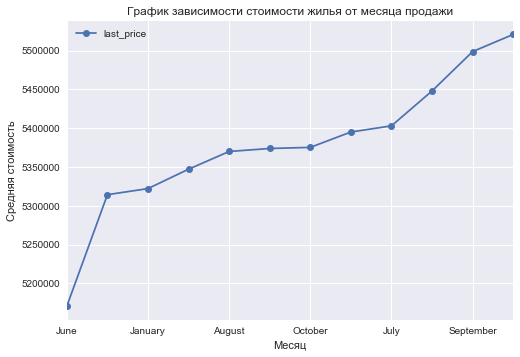

In [48]:
show_func('month')
plt.title('График зависимости стоимости жилья от месяца продажи')
plt.ylabel('Средняя стоимость')
plt.xlabel('Месяц')
plt.show()

Сложно говорить о какой-либо зависимости цен на недвижимость из-за месяца публикации объявления.
Средние значечения цены для каждого месяца мало отличаются друг от друга.

,last_price,count
year,,
2014,7.663012e+06,65
2015,5.748252e+06,862
2016,5.362594e+06,2597
2017,5.331652e+06,7762
2018,5.278034e+06,8110
2019,5.739994e+06,2560


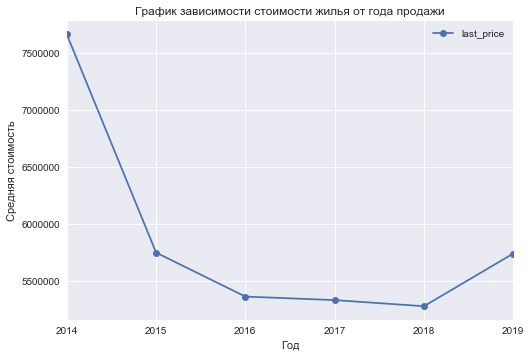

In [49]:
show_func('year', sort='year')
plt.title('График зависимости стоимости жилья от года продажи')
plt.ylabel('Средняя стоимость')
plt.xlabel('Год')
plt.show()

Крайне не однозначные результаты, зависимость цены от года публикации совершенно отсутствует, взможно из-за сильного отличия выборки для разных групп. Но поскольку количество публикаций, по годам сильно разниться, можно проследить, что при большем количестве публикаций средняя цена падает. Похоже на прямое влияние рыночной конкуренции.

### Населенные пункты с самой высокой и низкой стоимостью жилья

Выделим 10 населенных пунктов с наибольшим числом объявлении, посчитаем среднюю стоимость цены за квадратный метр, и на основании полученных данных определим населенные пункты с самой высокой и самой низкой стоимостью жилья.

In [50]:
popular_locations = df['locality_name'].value_counts().head(10)
popular_locations

Санкт-Петербург      14332
поселок Мурино         536
поселок Шушары         429
Всеволожск             380
Пушкин                 342
Колпино                322
поселок Парголово      318
Гатчина                296
деревня Кудрово        287
Выборг                 232
Name: locality_name, dtype: int64

In [51]:
ten_locations = df.query('locality_name in @popular_locations.index')
ten_locations.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_price,day_of_week,month,year,floors_group,ratio_living,ratio_kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,57,120370.370370,Thursday,March,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.72,11,18.6,1,True,...,0,NaN,81,82920.792079,Tuesday,December,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.72,5,34.3,4,True,...,2,574.0,558,92785.714286,Thursday,August,2015,Другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1,48.0,121,100000.000000,Tuesday,June,2018,Другой,0.320000,0.410000
6,6,3700000,37.3,2017-11-02,1,2.72,26,10.6,6,True,...,0,NaN,155,99195.710456,Thursday,November,2017,Другой,0.284182,0.386059


,area_price
locality_name,
Санкт-Петербург,108477.591241
Пушкин,101273.873174
деревня Кудрово,92287.617303
поселок Парголово,90058.403983
поселок Мурино,85731.178813
поселок Шушары,78677.016247
Колпино,75261.038663
Гатчина,68836.936003
Всеволожск,67312.851594


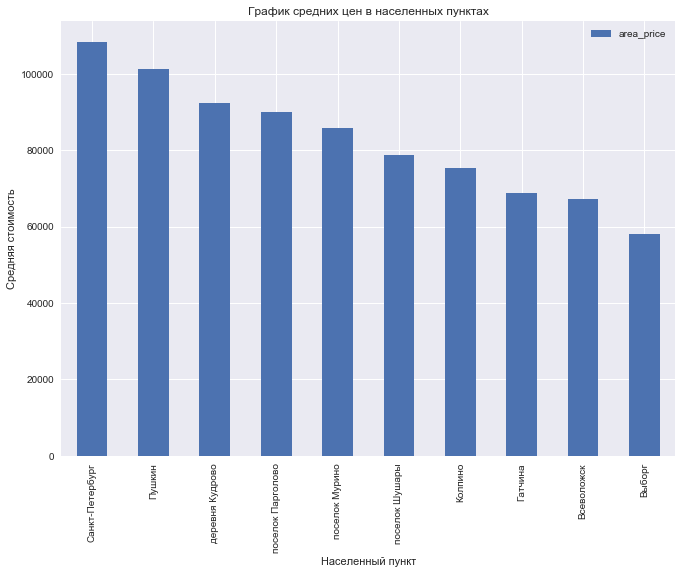

In [52]:
ten_locations = (
    ten_locations.pivot_table(index='locality_name', values='area_price')
    .sort_values(by='area_price', ascending=False)                      
)                                                                     
display(ten_locations)


ten_locations.plot(kind='bar', grid=True, figsize = (11, 8))
plt.title('График средних цен в населенных пунктах')
plt.ylabel('Средняя стоимость')
plt.xlabel('Населенный пункт')
plt.show()

Чем меньше объявлений в каком-либо населенном пунке, тем ниже и цена за квадратный метр жилья. Видимо снижается спрос под влиянием какого-то фактора, предположительно это удаленность от центра.

### Определение области центра города

Выделим недвижимость в городе Санкт-Петербург из исходного набора данных. Разобьем объявления по группам в зависимости от удаленности от центра. Проанализируем средние значения стоимости жилья полученных групп, и определим какая область входит в центр:

In [53]:
St_Petersburg = df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
                                                                     
def km(row):             
    return round(row / 1000)

St_Petersburg['centers_nearest_km'] = St_Petersburg['cityCenters_nearest'].apply(km)
St_Petersburg.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,area_price,day_of_week,month,year,floors_group,ratio_living,ratio_kitchen,centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,...,755.0,57,120370.370370,Thursday,March,2019,Другой,0.472222,0.231481,16
1,10,5196000,56.0,2015-08-20,2,2.72,5,34.30,4,True,...,574.0,558,92785.714286,Thursday,August,2015,Другой,0.612500,0.148214,14
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,...,48.0,121,100000.000000,Tuesday,June,2018,Другой,0.320000,0.410000,8
3,5,7915000,71.6,2019-04-18,2,2.72,24,41.48,22,True,...,NaN,15,110544.692737,Thursday,April,2019,Другой,0.579330,0.263966,12
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.60,7,True,...,NaN,289,88524.590164,Sunday,Febuary,2017,Другой,0.714754,0.106557,15


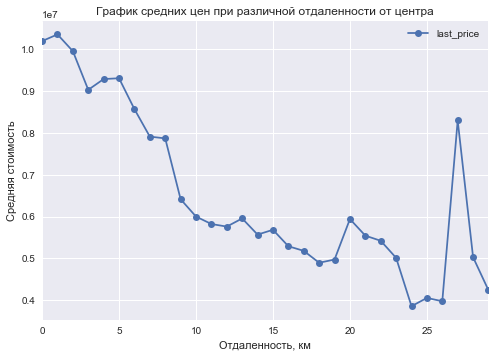

In [54]:
(
St_Petersburg.pivot_table(index='centers_nearest_km', values='last_price')
    .plot(style='o-', grid=True)
)
plt.title('График средних цен при различной отдаленности от центра')
plt.ylabel('Средняя стоимость')
plt.xlabel('Отдаленность, км')
plt.show()

На графике наблюдается значительный по относительным меркам провал средней цены за километр, между 8 и 9 километрами. Будем считать, что область радиосом в 8 километров относится к центру города.

### Сравнение по центру и по всем населенным пунктам

Выделим сегмент квартир в центре.

In [55]:
centers = St_Petersburg.query('centers_nearest_km < 9').reset_index(drop=True)
print('Количество объявлений в центре:', len(centers))
centers.head()

Количество объявлений в центре: 3341


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,area_price,day_of_week,month,year,floors_group,ratio_living,ratio_kitchen,centers_nearest_km
0,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121,100000.000000,Tuesday,June,2018,Другой,0.320000,0.410000,8
1,8,6500000,97.2,2015-10-31,2,2.72,3,46.5,1,True,...,124.0,265,66872.427984,Saturday,October,2015,Первый,0.478395,0.201646,2
2,6,15500000,149.0,2017-06-26,5,2.72,5,104.0,4,True,...,779.0,644,104026.845638,Monday,June,2017,Другой,0.697987,0.114094,4
3,20,11795000,136.0,2017-09-22,6,3.00,2,94.0,2,True,...,NaN,588,86727.941176,Friday,September,2017,Последний,0.691176,0.080882,7
4,18,7990000,74.0,2017-08-24,2,2.72,4,43.0,4,True,...,NaN,609,107972.972973,Thursday,August,2017,Последний,0.581081,0.270270,4


Изучение параметров: площадь, цена, количество комнат и высота потолков для центра:

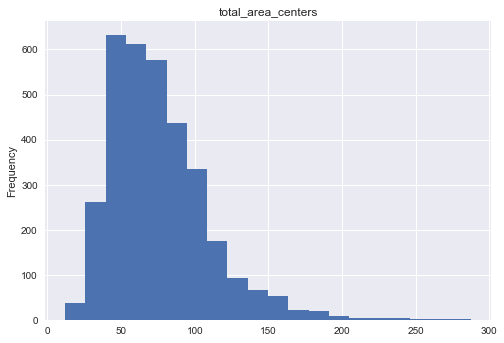

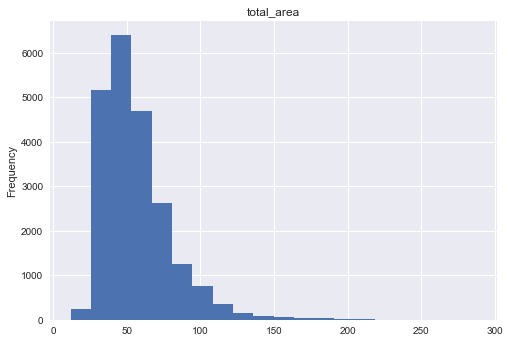

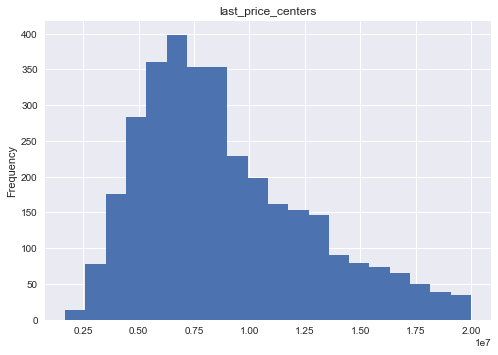

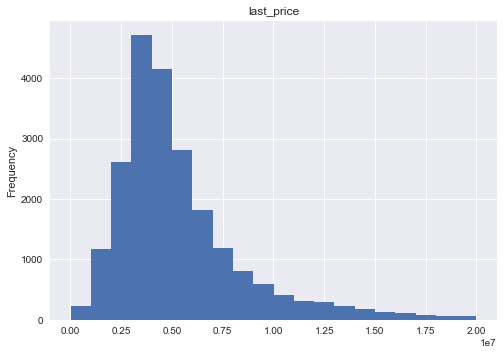

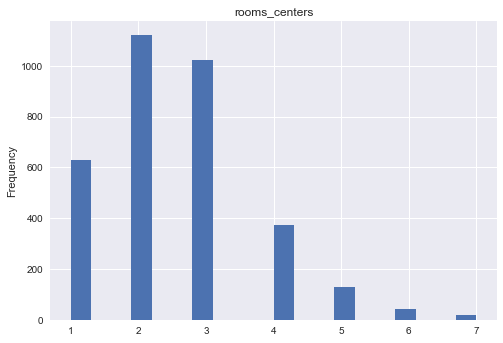

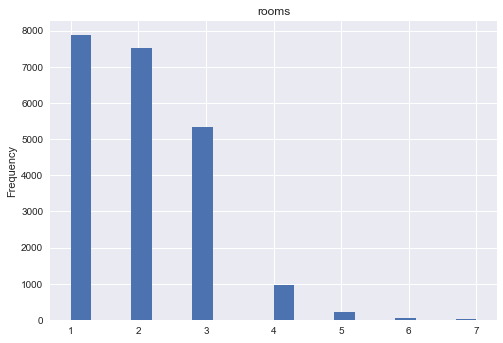

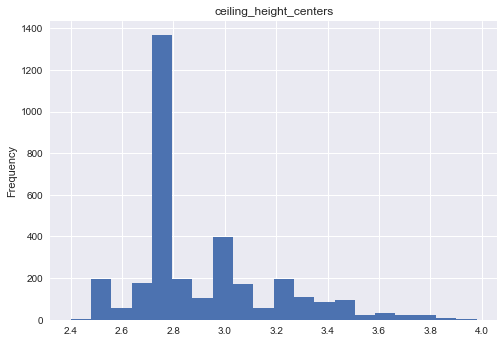

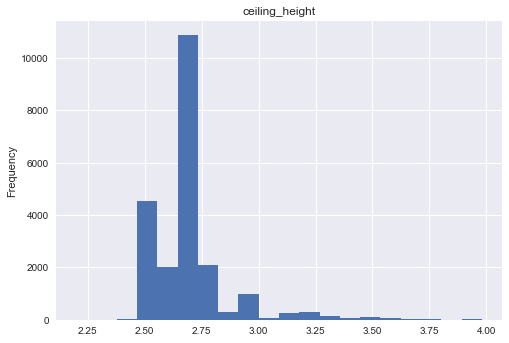

In [56]:
for i in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    centers[i].plot(title=i + '_centers', kind='hist',bins=20, grid=True)
    plt.show()
    df[i].plot(title=i, kind='hist',bins=20, grid=True)
    plt.show()  

Даные всех параметров имеют нормальное распределение, и ничем не отличаются от данных по всему датафрэйму.

Изучим количество комнат, этаж, удаленность от центра и дату публикации для центра, и определим степерь влияния этих факторов на формирование стоимости жилья:

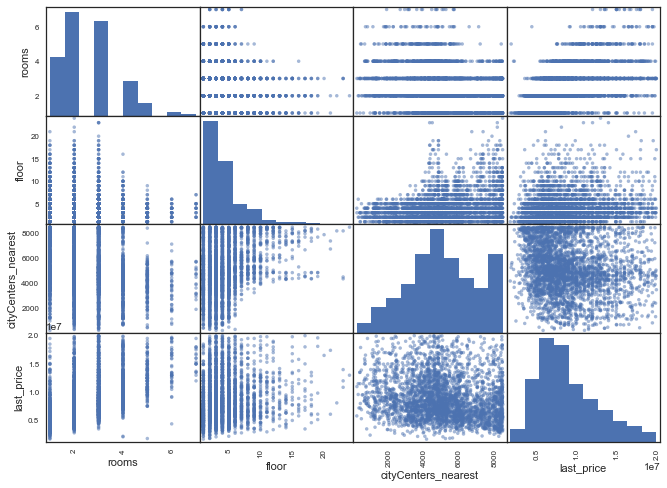

,rooms,floor,cityCenters_nearest,last_price
rooms,1.000000,-0.122569,-0.238473,0.512686
floor,-0.122569,1.000000,0.294047,0.124259
cityCenters_nearest,-0.238473,0.294047,1.000000,-0.175673
last_price,0.512686,0.124259,-0.175673,1.000000


In [57]:
price_factors = centers[['rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition', 'last_price']]

plt.style.use('seaborn-white')
pd.plotting.scatter_matrix(price_factors, figsize=(11, 8))
plt.show()
price_factors.corr()

При оценке факторов, влияющих на стоимость жилья, для недвижимости в центре, наблюдается сильная схожесть результатов с результатами по всем данным. Кореляция цены с количеством комнат очень близкое значение коэффициента Пирсона. Между ценой и этажем практически отсутствует какая-либо взаимосвязь. Из различий можно наблюдать разницу в значениях коэффициента Пирсона для корреляции цены и удаленности от центра, это можно объяснить тем, что сама область центра города не так уж велика, чтобы по такой маленькой выборке можно проследить изменение, вот поэтому и имеется более низкое значение коэффициента корреляции.

Анализ зависимости цены на недвижимость в центре, от даты размещения объявления:

,last_price,count
day_of_week,,
Saturday,8.417346e+06,251
Tuesday,8.686407e+06,576
Friday,8.895017e+06,573
Monday,8.955876e+06,485
Sunday,8.970353e+06,184
Thursday,9.012500e+06,678
Wednesday,9.153669e+06,594


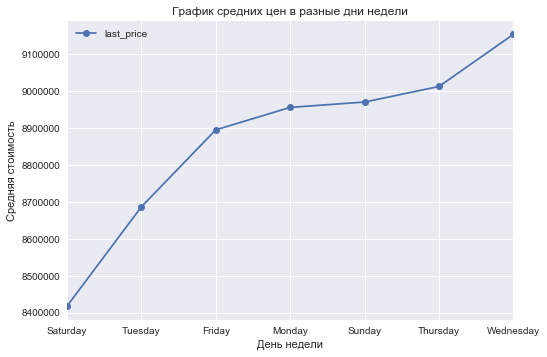

In [58]:
def center_show_func(col, sort='last_price'):
    centers_pivot = centers.pivot_table(index=col, values='last_price')
    centers_pivot['count'] = centers[col].value_counts()
    centers_pivot = centers_pivot.sort_values(by=sort)
    return display(centers_pivot), plt.show(), centers_pivot.plot(y='last_price', style='o-')

plt.style.use('seaborn')
center_show_func('day_of_week')
plt.title('График средних цен в разные дни недели')
plt.ylabel('Средняя стоимость')
plt.xlabel('День недели')
plt.show()

,last_price,count
month,,
December,8.263647e+06,223
June,8.642057e+06,263
October,8.800918e+06,292
August,8.806201e+06,249
May,8.831105e+06,189
January,8.880441e+06,195
April,8.938089e+06,315
July,8.987682e+06,270
Febuary,9.049354e+06,351


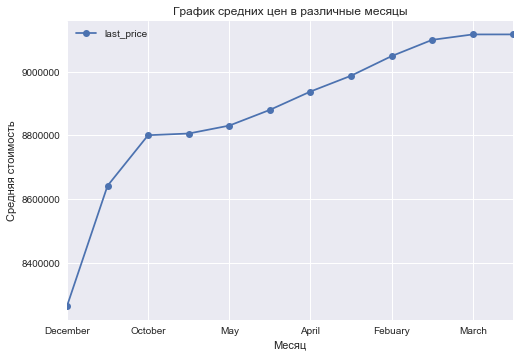

In [59]:
center_show_func('month')
plt.title('График средних цен в различные месяцы')
plt.ylabel('Средняя стоимость')
plt.xlabel('Месяц')
plt.show()

,last_price,count
year,,
2014,1.072304e+07,17
2015,8.755885e+06,205
2016,9.014378e+06,461
2017,8.877611e+06,1229
2018,8.763597e+06,1080
2019,9.302932e+06,349


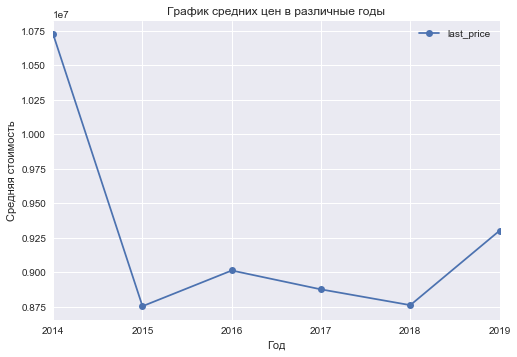

In [60]:
center_show_func('year', sort='year')
plt.title('График средних цен в различные годы')
plt.ylabel('Средняя стоимость')
plt.xlabel('Год')
plt.show()

Проанализировав стоимость недвижимости в центре от даты размещения, хочется отметить общую схожесть для всего набора данных, однако есть и расхождения, и если зависимость от года публикации объявления очень походит как для центра так и для всего пространства, то в зависимости дня недели и месяца видно, что самые высокие и самые низкие показатели средней стоимости жилья в центре приходятся на другие дни недели и месяцы, нежели чем всех населенных пунктак общего набора данных. Важно обратить внимание, что в данных центра мы имеем дело с гораздо меньшей выборкой данных, а так же со значетельно более высокой средней ценой на стоимость недвижимости.

### Вывод
Проведя исследовательский анализ данных удалось очень подробно изучить все данные и сделать массу очень важных и полезных выводов. Например, имелась возможность заглянуть в данные по площади, цене, количеству комнатам, а также высоте потолков, благодаря этому удалось отследить и устранить все артефактные значения. Самое важное, что на данном этапе было произведено много вычеслений по выявлению взаимосвязи некоторых факторов с ценой недвижимости, благодаря этому будет возможно определять рыночную стоимость недвижимости.

## Общий вывод

Выполнив эту проектную работу, я закрепил полученные на данном спринте знания по изучению данных, построению графиков, выделению срезов данных, а так же определению взаимосвязи. После чего, мною было сделано несколько обоснованных выводов важных выводов, на основании данных по недвижимости. Несомненно иследовательский анализ данных важный и необхдимый этап изучения данных, благодаря ему можно подробно изучить, прочувствовать все данные и даже заглянуть внутрь, а это позволяет уведеть скрытые на первый взгляд, но очень важные свойства и зависимости структуры данных.